In [1]:
import numpy as np
import pandas as pd

table_2 = pd.read_csv('2_column.csv')

In [2]:
def chunker_algorithm(cube_size):

    def split(table):
        split_axis = find_split_axis(table)
        element_count = table[split_axis].count()

        median = np.median(table[split_axis])
        split_table1 = table[table[split_axis] > median]
        split_table2 = table[table[split_axis] < median]

        table_median = table.loc[table[split_axis] == median]
        half_of_all = table[split_axis].count()/2

        if split_table1[split_axis].count() != split_table2[split_axis].count():
            split_table1 = split_table1.append(
                table_median.head(int(half_of_all - split_table1[split_axis].count())))
            split_table2 = split_table2.append(
                table_median.tail(int(half_of_all - split_table2[split_axis].count())))

        if element_count > cube_size:
            return split(split_table1) + split(split_table2)
            
        else:
            chunk = []
            for col in table.columns:
                chunk.append({
                    "column": col,
                    "minimum": table[col].min(),
                    "maximun": table[col].max(),
                })

            return [chunk]

    def find_split_axis(table):
        greatest_variance = 0
        for col in table.columns:
            variance = table[col].var()
            if variance > greatest_variance:
                greatest_variance = variance
                split_axis = col
        return split_axis
    
    
    return split(table_2)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
import seaborn as sns

def draw_2d(chunks_borders):
    x_min = table_2.A.min()
    x_max = table_2.A.max()
    y_min = table_2.B.min()
    y_max = table_2.B.max()
    
    fig, ax = plt.subplots()
    for bord in chunks_borders:
        ax.add_artist(mpatch.Rectangle((bord[0]["minimum"], bord[1]["minimum"]), 
                                     bord[0]["maximun"]-bord[0]["minimum"], bord[1]["maximun"]-bord[1]["minimum"], fill = None))
    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    plt.show()

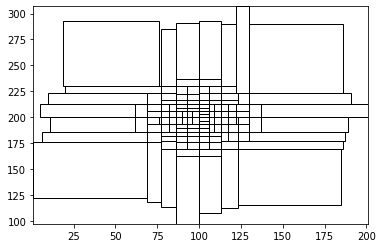

In [5]:
chunks_borders = chunker_algorithm(10000)
draw_2d(chunks_borders)